# Customer Churn Analysis- Medel Building

## Import libraries and preprocessed dataset

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
# pip install imblearn

In [3]:
df = pd.read_csv("processed_tele_churn.csv")

In [4]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [5]:
df=df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


## X- Y split

In [7]:
X = df.drop('Churn', axis=1)

In [8]:
X.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
y = df["Churn"]

In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

## Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
x_train.shape

(5625, 50)

In [13]:
x_test.shape

(1407, 50)

## Decision Tree Classifier

In [14]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [15]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [16]:
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

In [18]:
print(classification_report(y_test, y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.50      0.55       369

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_train, y_train_pred)

0.8131555555555555

In [21]:
accuracy_score(y_test, y_test_pred)

0.7867803837953091

In [23]:
cm=confusion_matrix(y_test, y_test_pred)
cm

array([[923, 115],
       [185, 184]], dtype=int64)

* the precision and recall for churners is  0.62 and 0.50 which is very low
* It means our model is not correctly trained
* reason is the data is imbalanced

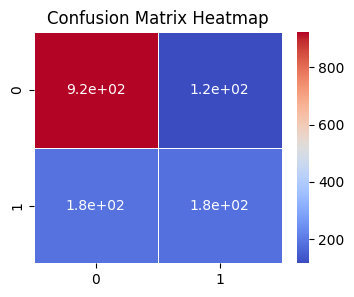

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.show()

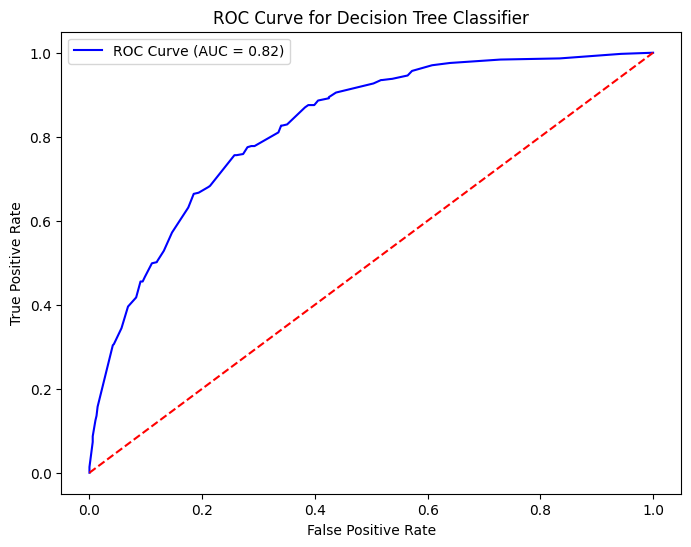

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for ROC curve (get probabilities of the positive class)
y_proba = dtc.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

## Upsampling

In [32]:
sm = SMOTEENN()

In [33]:
x_resampled, y_resampled = sm.fit_resample(X, y)

In [34]:
x_resampled.shape

(5778, 50)

In [35]:
from collections import Counter

In [36]:
Counter(y)

Counter({0: 5163, 1: 1869})

In [37]:
Counter(y_resampled)

Counter({1: 3124, 0: 2654})

In [38]:
y_resampled.shape, y.shape

((5778,), (7032,))

In [39]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [40]:
dtc_smote = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [41]:
dtc_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [42]:
y_pred_smote = dtc_smote.predict(xr_test)

In [43]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       530
           1       0.95      0.96      0.95       626

    accuracy                           0.95      1156
   macro avg       0.95      0.95      0.95      1156
weighted avg       0.95      0.95      0.95      1156



In [44]:
confusion_matrix(yr_test, y_pred_smote)

array([[499,  31],
       [ 28, 598]], dtype=int64)

In [45]:
accuracy_score(yr_test, y_pred_smote)

0.948961937716263

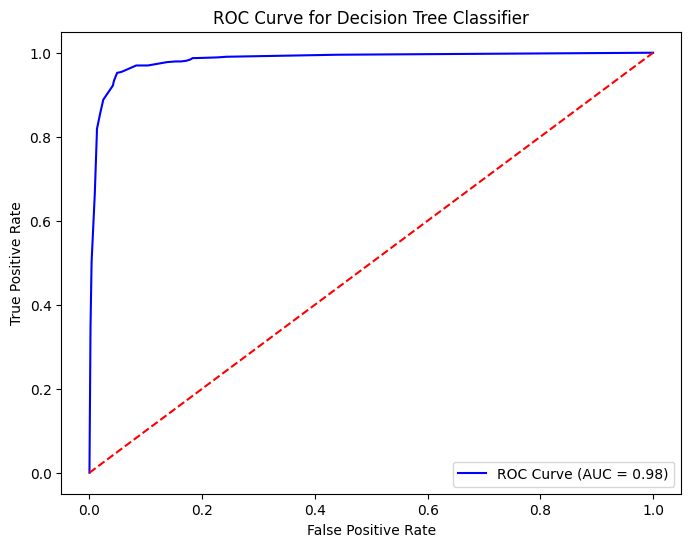

In [55]:
y_proba = dtc_smote.predict_proba(xr_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yr_test, y_proba)
auc = roc_auc_score(yr_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

## Random Forest Classifier


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc.fit(x_train, y_train)
rfc_y_pred = rfc.predict(x_test)
print(classification_report(y_test, rfc_y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1038
           1       0.66      0.44      0.53       369

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [49]:
confusion_matrix(y_test, rfc_y_pred)

array([[955,  83],
       [205, 164]], dtype=int64)

In [50]:
rfc_smote = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc_smote.fit(xr_train, yr_train)
rfc_y_pred_smote = rfc_smote.predict(xr_test)
print(classification_report(yr_test, rfc_y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       530
           1       0.93      0.95      0.94       626

    accuracy                           0.94      1156
   macro avg       0.94      0.94      0.94      1156
weighted avg       0.94      0.94      0.94      1156



In [51]:
confusion_matrix(yr_test, rfc_y_pred_smote)

array([[488,  42],
       [ 29, 597]], dtype=int64)

In [52]:
rfc2 = RandomForestClassifier(n_estimators=1000, criterion = 'gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc2.fit(xr_train, yr_train)
y_pred2 = rfc2.predict(xr_test)
print(classification_report(yr_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       530
           1       0.94      0.95      0.95       626

    accuracy                           0.94      1156
   macro avg       0.94      0.94      0.94      1156
weighted avg       0.94      0.94      0.94      1156



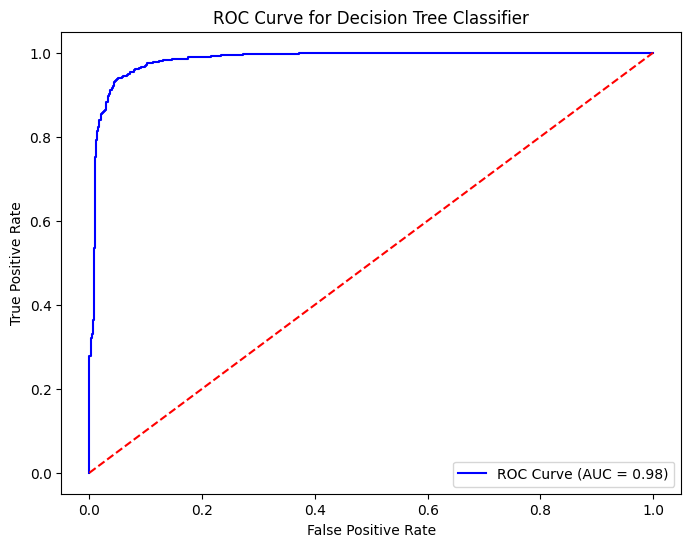

In [56]:
y_proba = rfc2.predict_proba(xr_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yr_test, y_proba)
auc = roc_auc_score(yr_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

## Grid search for finding best params

In [57]:
from sklearn.model_selection import GridSearchCV
# Features which are same for all trees are passed directly
rf_clf= RandomForestClassifier(n_estimators=250 , random_state=100)

params_grid = {"max_features": [4,5,6,7,8,9,10], 
               "min_samples_split": [2,3,10]}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring="accuracy")

grid_search.fit(xr_train, yr_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [58]:
grid_search.best_params_

{'max_features': 7, 'min_samples_split': 2}

In [59]:
best_model = grid_search.best_estimator_

In [60]:
y_pred3 = best_model.predict(xr_test)
print(classification_report(yr_test, y_pred3, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       530
           1       0.96      0.96      0.96       626

    accuracy                           0.96      1156
   macro avg       0.96      0.96      0.96      1156
weighted avg       0.96      0.96      0.96      1156



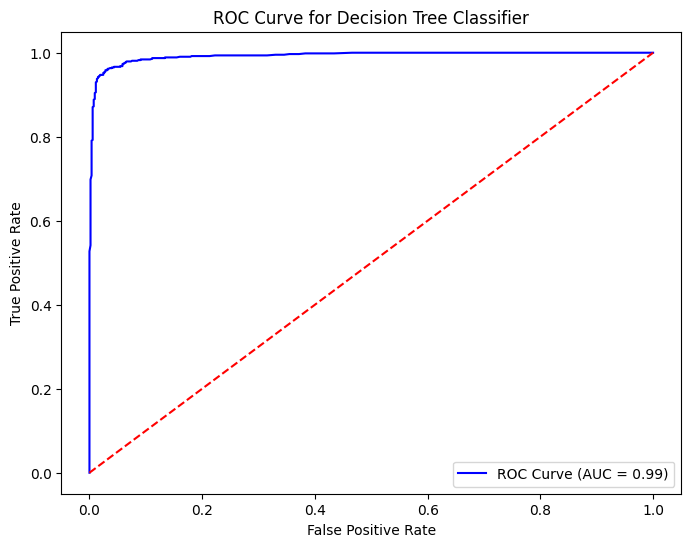

In [61]:
y_proba = best_model.predict_proba(xr_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yr_test, y_proba)
auc = roc_auc_score(yr_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

## XG Boost 

In [62]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)
xgb_clf.fit(xr_train, yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred4 = xgb_clf.predict(xr_test)
print(classification_report(yr_test, y_pred4, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       530
           1       0.98      0.96      0.97       626

    accuracy                           0.96      1156
   macro avg       0.96      0.96      0.96      1156
weighted avg       0.96      0.96      0.96      1156



In [64]:
# print(classification_report(yr_train, xgb_clf.predict(xr_train), labels=[0,1]))

## Grid Search for XG Boost

In [65]:
xgb_clf = xgb.XGBClassifier(n_estimators=10000, learning_rate=0.3, random_state=100)
# param_grid = {
#     'max_depth': [4, 5, 6],  # Explore a narrower range around the current depth (5)
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],  # Explore lower learning rates to potentially improve generalization
#     'n_estimators': [100, 500, 1000],  # Use fewer estimators with lower learning rates to avoid overfitting
#     'gamma': [0, 0.1, 0.3, 0.5],  # Test different regularization to control overfitting
#     'subsample': [0.8, 0.9, 1.0],  # Test with full and partial datasets to boost generalization
#     'colsample_bytree': [0.8, 0.9, 1.0],  # Test using different feature fractions for each tree
#     'reg_alpha': [0, 0.01, 0.1],  # L1 regularization (lasso) to prevent overfitting
#     'reg_lambda': [1, 1.5, 2],  # L2 regularization (ridge) for more control on overfitting
#     'min_child_weight': [1, 3, 5]  # Control how sensitive the model is to overfitting
# }

param_grid = {
    'max_depth': [4, 5, 6,7,8],
    'learning_rate': [0.01, 0.1, 0.3,0.4],
    'n_estimators': [500, 1000,10000]
}

grid_search = GridSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(xr_train, yr_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=10000,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.4],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [500, 1000, 10000]},
             scoring='accuracy')

In [66]:
best_params= grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}


In [67]:
cvxg_clf = grid_search.best_estimator_
y_pred5= cvxg_clf.predict(xr_test)
print(classification_report(yr_test, y_pred5, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       530
           1       0.97      0.96      0.97       626

    accuracy                           0.96      1156
   macro avg       0.96      0.96      0.96      1156
weighted avg       0.96      0.96      0.96      1156



In [68]:
# print(classification_report(yr_train, cvxg_clf.predict(xr_train), labels=[0,1]))

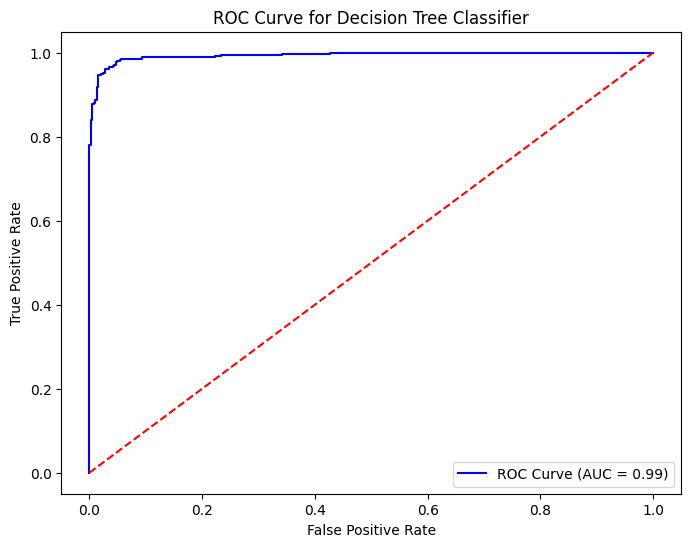

In [69]:
y_proba = cvxg_clf.predict_proba(xr_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yr_test, y_proba)
auc = roc_auc_score(yr_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

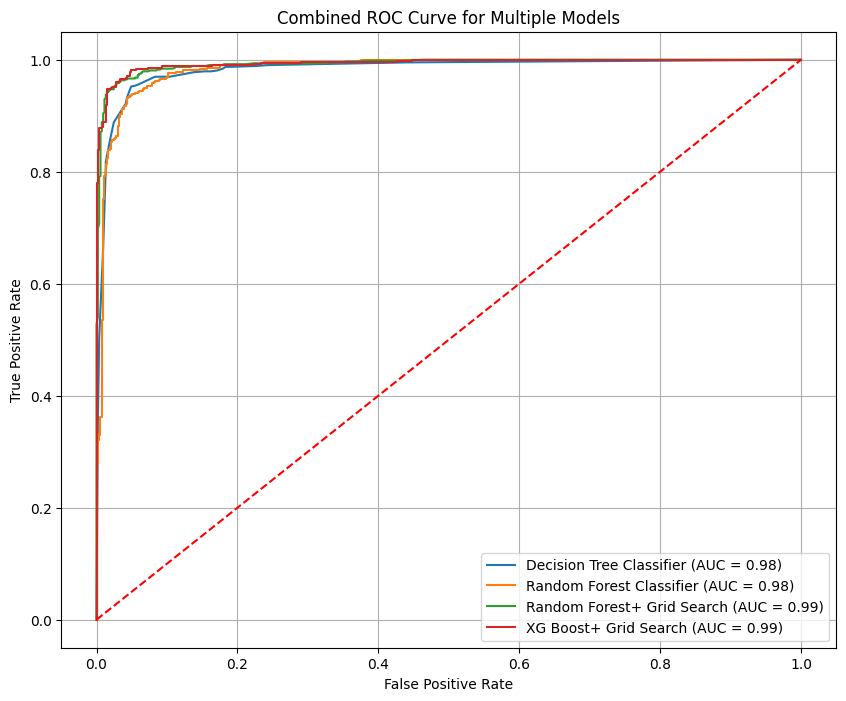

In [70]:
# Initialize classifiers
models = {
    "Decision Tree Classifier":dtc_smote,
    "Random Forest Classifier":rfc2,
    "Random Forest+ Grid Search":best_model,
    "XG Boost+ Grid Search": cvxg_clf
}

# Prepare to plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    
    # Predict probabilities
    y_proba = model.predict_proba(xr_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(yr_test, y_proba)
    auc = roc_auc_score(yr_test, y_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for Multiple Models')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [58]:
print(cvxg_clf.predict_proba(xr_test))

[[4.7683716e-07 9.9999952e-01]
 [6.2829256e-04 9.9937171e-01]
 [1.0219812e-03 9.9897802e-01]
 ...
 [2.7095062e-01 7.2904938e-01]
 [1.4763546e-01 8.5236454e-01]
 [0.0000000e+00 1.0000000e+00]]


## Save model

In [1]:
import pickle

In [2]:
filename = 'customer_churn.sav'

In [4]:
# pickle.dump(cvxg_clf, open(filename, 'wb'))

In [5]:
model = pickle.load(open(filename, 'rb'))

In [6]:
# model.score(xr_test, yr_test)

In [17]:
y_pred=model.predict(x_test)

In [18]:
print(y_pred)

[1 0 0 ... 1 0 0]


In [19]:
y_pred.shape

(1407,)

In [20]:
y_prob = model.predict_proba(x_test)

In [21]:
y_prob

array([[1.6073585e-03, 9.9839264e-01],
       [9.9999225e-01, 7.7516124e-06],
       [9.8891264e-01, 1.1087359e-02],
       ...,
       [4.6035647e-03, 9.9539644e-01],
       [9.9534845e-01, 4.6515344e-03],
       [9.9512190e-01, 4.8780837e-03]], dtype=float32)

In [24]:
churn_probabilities = [pred[1] for pred in y_prob]
# churn_probabilities

[0.99839264,
 7.751612e-06,
 0.011087359,
 0.9988103,
 0.99999976,
 0.0003284737,
 0.99528307,
 0.9999727,
 0.002199167,
 0.0506519,
 0.073985636,
 7.2753396e-06,
 0.056821745,
 2.3684055e-07,
 9.733346e-07,
 3.7474172e-05,
 1.7142218e-08,
 0.99974114,
 5.538692e-07,
 6.530253e-05,
 0.008004289,
 0.99577856,
 4.070238e-05,
 0.00052661204,
 0.0016868463,
 5.6839247e-07,
 4.0707113e-05,
 1.3624808e-05,
 0.9999999,
 0.99999845,
 1.1224089e-06,
 2.3526879e-07,
 5.5408685e-07,
 6.023389e-06,
 7.6567727e-07,
 0.038670395,
 2.2030822e-06,
 0.0006577587,
 0.096578285,
 0.78857994,
 0.9999994,
 2.5883212e-08,
 3.6880767e-06,
 1.0,
 6.171283e-07,
 6.062098e-07,
 1.1751778e-06,
 0.50307333,
 0.99999666,
 0.56181675,
 0.020427434,
 0.14313787,
 0.8417349,
 0.9999366,
 0.683367,
 0.00012484084,
 0.0009992969,
 0.9999323,
 0.22428814,
 0.99996674,
 0.001749154,
 0.0025776802,
 0.99965405,
 1.6368382e-06,
 1.5049565e-07,
 0.024770707,
 1.6548744e-05,
 3.434834e-07,
 9.4949115e-05,
 1.1449416e-06,
 0.

In [25]:
# for i in range(100):
#     print(y_prob[i][1])

In [27]:
# xr_test.info()

## SHAP Analysis
SHAP Values: SHAP (SHapley Additive exPlanations) is a popular method to explain the output of machine learning models. It tells you which features pushed the prediction towards or away from a certain outcome (e.g., churning or not churning).

In [28]:
pip install shap


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 381.6 kB/s eta 0:00:06
   ------- -------------------------------- 0.5/2.7 MB 381.6 kB/s eta 0:00:06
   ------- -------------------------------- 0.5/2.7 MB 381.6 kB/s eta 0:00:06
   ----------- ---------------------------- 0.8/2.7 MB 385.8 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.7 MB 385.8 kB/s eta 0:00:05
   --------------- ------------------------ 1.0/2.7 MB 437.6 kB/s eta 0:00:04
   --------------- ------------------------ 1.0/2.7 MB 437.6 kB/s eta 0:00:04
   --------------- --------------------

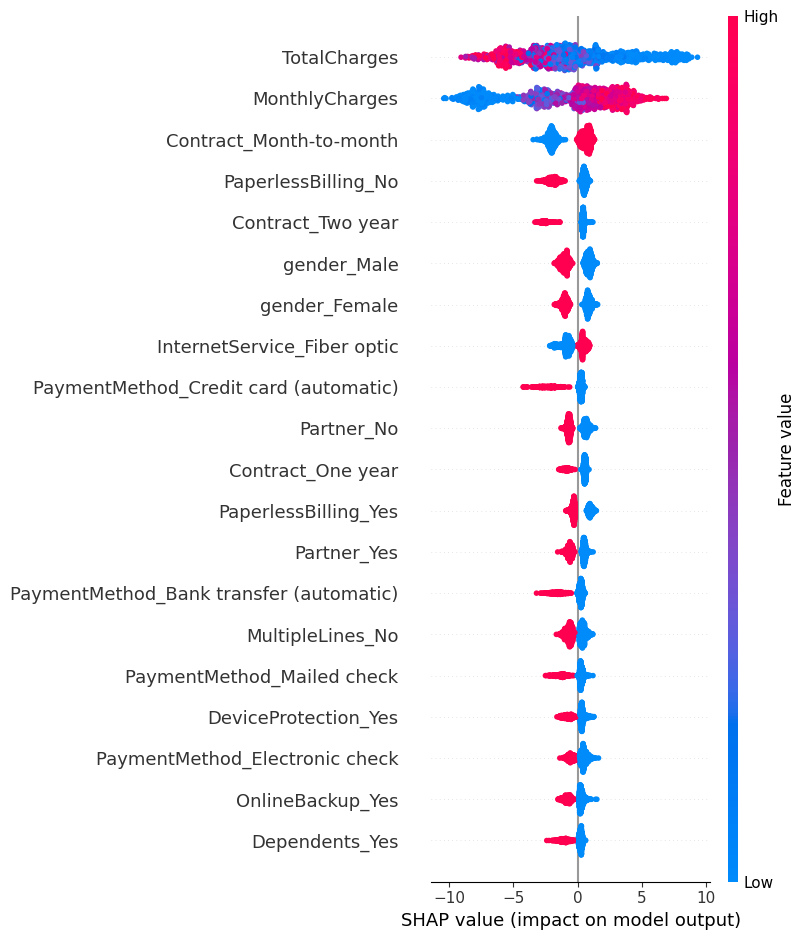

In [30]:
import shap

# Assuming X_test is your feature data and model is your trained model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# Use shap_values[1] for the class representing churn
# This will explain each customer's churn prediction
shap.summary_plot(shap_values, x_test)
